# Sistemas de recomendación

In [1]:
import pandas as pd

### Carga de datos

In [2]:
df = pd.read_csv('F:/BD/GitHub/mlearningcourse/datasets/ml-100k/u.data.csv',
                sep = '\t', header = None)

In [3]:
df.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df.shape

(100000, 4)

In [5]:
df.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [6]:
# Cambiar nombre de las columnas del dataset
columns=['User_id', 'Item_id','Rating', 'Fecha']
df.columns = columns

In [7]:
#df.Fecha = pd.to_datetime(df.Fecha)
#df.Fecha.dt.date
df['Fecha_R'] = pd.to_datetime(df.Fecha)

In [8]:
df.head()

,User_id,Item_id,Rating,Fecha,Fecha_R
0,196,242,3,881250949,1970-01-01 00:00:00.881250949
1,186,302,3,891717742,1970-01-01 00:00:00.891717742
2,22,377,1,878887116,1970-01-01 00:00:00.878887116
3,244,51,2,880606923,1970-01-01 00:00:00.880606923
4,166,346,1,886397596,1970-01-01 00:00:00.886397596


### Análisis exploratorio de datos

In [9]:
import matplotlib.pyplot as plt

(array([ 6110.,     0., 11370.,     0.,     0., 27145.,     0., 34174.,
            0., 21201.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

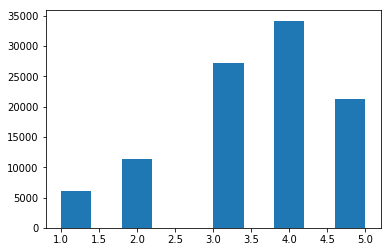

In [10]:
# Histograma de Ratings
plt.hist(df.Rating)

In [11]:
# Histograma de Ratings
#plt.hist(df.Fecha)

In [12]:
df.groupby(['Rating'])['User_id'].count().sort_values(ascending = False)
# agrupador.sort_values(ascending = False)

Rating
4    34174
3    27145
5    21201
2    11370
1     6110
Name: User_id, dtype: int64

(array([1.146e+03, 2.490e+02, 1.390e+02, 6.700e+01, 3.800e+01, 2.400e+01,
        7.000e+00, 5.000e+00, 6.000e+00, 1.000e+00]),
 array([  1. ,  59.2, 117.4, 175.6, 233.8, 292. , 350.2, 408.4, 466.6,
        524.8, 583. ]),
 <a list of 10 Patch objects>)

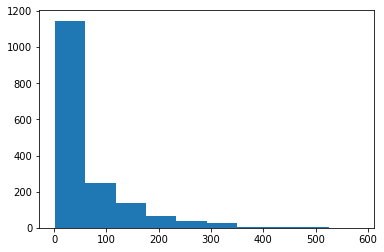

In [13]:
# Histograma para saber cuantas veces han sido visto algunaslas películas
plt.hist(df.groupby(['Item_id'])['Item_id'].count())

### Representación matricial
* Sistema de recomendación

In [14]:
# Número de usuarios que existen
n_users = df.User_id.unique().shape[0]
n_users

943

In [15]:
# Número de películas
n_items = df.Item_id.unique().shape[0]
n_items

1682

#### Guardar datos

In [16]:
import numpy as np

# Matriz de ceros
ratings = np.zeros((n_users, n_items))
ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
# Se transforma en una matriz 2D (valoraciones) -- ND array
for row in df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]

In [18]:
ratings.shape

(943, 1682)

In [19]:
type(ratings)

numpy.ndarray

In [20]:
sparsity = float (len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0]*ratings.shape[1])
sparsity *= 100
print('Coefienciente de sparseidad: {:4.2f}%'.format(sparsity))

Coefienciente de sparseidad: 6.30%


In [21]:
# El 6.3 % de los datos no tienen cero (ausencia de valores)

### Crear conjunto de entrenamiento y validación

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
ratings_train, ratings_test = train_test_split(ratings, 
                                              test_size = 0.3, 
                                              random_state = 42)  # Semilla

In [24]:
# Conjunto de entrenamiento
ratings_train.shape

(660, 1682)

In [25]:
# Conjunto de test (Para ofrecerles una recomendación)
ratings_test.shape

(283, 1682)

### Filtro colaborativo basado en usuarios
* Matriz de similaridad entre los usuarios
* Predecir la valoración desconocida de un ítem *i* para un usuario activo *u*, basándonos en la suma ponderada de todas las valoraciones del resto de usuarios para dicho ítem.
* Recomendaremos los nuevos ítems a los usuarios según lo establecido en pasos anteriores.

In [26]:
import numpy as np
import sklearn 

#### Distancia del coseno

In [27]:
# Transformar senos en 1, y los 1 en 0
sim_matriz = 1 - sklearn.metrics.pairwise.cosine_distances(ratings_train)

In [28]:
type(sim_matriz)

numpy.ndarray

In [29]:
sim_matriz.shape

(660, 660)

In [30]:
sim_matriz

array([[1.        , 0.17448349, 0.18009754, ..., 0.13331459, 0.17695593,
        0.21882481],
       [0.17448349, 1.        , 0.07993097, ..., 0.07175808, 0.09552622,
        0.05512655],
       [0.18009754, 0.07993097, 1.        , ..., 0.0191736 , 0.02233385,
        0.10310785],
       ...,
       [0.13331459, 0.07175808, 0.0191736 , ..., 1.        , 0.04853428,
        0.05142508],
       [0.17695593, 0.09552622, 0.02233385, ..., 0.04853428, 1.        ,
        0.1198022 ],
       [0.21882481, 0.05512655, 0.10310785, ..., 0.05142508, 0.1198022 ,
        1.        ]])

In [31]:
users_predictions = sim_matriz.dot(ratings_train) / np.array([np.abs(sim_matriz).sum(axis=1)]).T

In [32]:
# Valoración que cada usuario le daría a cada ítem
users_predictions

array([[2.10259747e+00, 5.86975978e-01, 3.40264192e-01, ...,
        0.00000000e+00, 7.33611460e-03, 6.04379414e-03],
       [1.40999723e+00, 2.91863934e-01, 2.68085289e-01, ...,
        0.00000000e+00, 3.50378592e-03, 2.32963985e-03],
       [1.69014833e+00, 3.13648440e-01, 3.26127887e-01, ...,
        0.00000000e+00, 3.25391767e-03, 1.77210119e-03],
       ...,
       [1.73393747e+00, 4.06719333e-01, 3.21166908e-01, ...,
        0.00000000e+00, 2.71269625e-03, 9.00511411e-03],
       [2.34361031e+00, 8.10544770e-01, 4.73941025e-01, ...,
        0.00000000e+00, 1.01130066e-02, 9.66427605e-03],
       [2.36796969e+00, 5.98146138e-01, 3.85569804e-01, ...,
        0.00000000e+00, 6.39996638e-03, 5.37442746e-03]])

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
def get_mse(preds, actuals):
    preds = preds[actuals.nonzero()].flatten()
    actuals = actuals[actuals.nonzero()].flatten()
    return mean_squared_error(preds, actuals)

In [35]:
get_mse(users_predictions, ratings_train)

7.878218313143215

In [36]:
get_mse(users_predictions, ratings_test)

8.745164067978985

## Filtro colaborativo basado en los K nearest neighbors

In [38]:
from sklearn.neighbors import nearest_centroid, NearestNeighbors

In [40]:
# Selección de objetivos
k = 10

In [41]:
neighbors = NearestNeighbors(k, 'cosine')  #similaridad del coseno

In [42]:
neighbors.fit(ratings_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2,
         radius='cosine')

In [43]:
top_k_distancies, top_k_users = neighbors.kneighbors(ratings_train, return_distance = True)

In [44]:
top_k_distancies.shape

(660, 10)

In [45]:
# Distancias entre usuarios
top_k_distancies[0]

array([ 0.        , 41.71330723, 43.3474336 , 45.04442252, 45.04442252,
       45.18849411, 45.19955752, 45.254834  , 45.35416188, 45.39823785])

In [46]:
# Usuarios
top_k_users[0]

array([  0, 211,  16, 428, 583, 279, 149, 188, 196, 424], dtype=int64)

In [57]:
users_predicts_k = np.zeros(ratings_train.shape)
for i in range(ratings_train.shape[0]): # Para cada usuario del conjunto de entrenamiento
    users_predicts_k[i,:] = top_k_distancies[i].T.dot(ratings_train[top_k_users][i]) / np.array([np.abs(top_k_distancies[i].T).sum(axis=0)]).T
    
    
    

In [58]:
users_predicts_k.shape

(660, 1682)

In [59]:
users_predicts_k

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.66502836, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.31240293, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [60]:
get_mse(users_predicts_k, ratings_train)

8.229125487414281

In [61]:
get_mse(users_predicts_k, ratings_test)

11.245929371299852

## Filtro colaborativo basado en items

In [63]:
n_movies = ratings_train.shape[1]
n_movies

1682

In [64]:
neighbors = NearestNeighbors(n_movies, 'cosine')

In [65]:
neighbors.fit(ratings_train.T)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=1682, p=2,
         radius='cosine')

In [68]:
top_k_distances, top_k_items = neighbors.kneighbors(ratings_train.T, return_distance = True)

In [69]:
top_k_distances.shape

(1682, 1682)

In [70]:
top_k_items

array([[   0,  120,  404, ...,  285,  312,  301],
       [   1,  575,  232, ...,  257,   99,   49],
       [   2,  742, 1094, ...,  180,   99,   49],
       ...,
       [1565, 1571, 1570, ...,  180,   99,   49],
       [1680, 1671, 1582, ...,  180,   99,   49],
       [1681, 1596, 1592, ...,  180,   99,   49]], dtype=int64)

In [71]:
item_preds = ratings_train.dot(top_k_distances) / np.array([np.abs(top_k_distances).sum(axis = 1)])

In [72]:
item_preds.shape

(660, 1682)

In [73]:
get_mse(item_preds, ratings_train)

11.172565375125632